# COMP6915 - Assignment2 - Team 12

### Data Set

The data consists of a total of 8 features, among which 7 features relate to the relative amounts of the ingredients (Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate respectively) in a concrete mixture, while a single feature denotes the age of the concrete.   

Experimentally determined compressive strength for the given concrete mixture is provided as the outcome variable. The “training” and “test” datasets consisting of 800 and 100 samples respectively are given in the train.csv and test.csv files respectively.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from local session files
# train_data = pd.read_csv("train.csv")
# test_data = pd.read_csv("test.csv")

# Load the data from Drive files
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive', force_remount=True)

dir_path = r"/content/drive/MyDrive/Colab Notebooks/MLA2/"
p_train_data = dir_path+"train.csv"
p_test_data = dir_path+"test.csv"

train_data = pd.read_csv(p_train_data)
test_data = pd.read_csv(p_test_data)

# Extract the Data
#############################################
# Extract the Design Matrix of 8 features from the Training and Test Data
X_train = train_data.iloc[:, :-1]
X_test = test_data.iloc[:, :-1]

# Extract Output ConcreteCompressiveStrength_MPa_Megapascals_ from Training and Test Data
y_train = train_data.iloc[:, -1]
y_test = test_data.iloc[:, -1]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1

---

* Train a multivariate ordinary least squares (“simple”) linear regression model to predict the compressive strength of an input concrete mixture based on the relevant features. 

* Estimate the “Err” using both the **validation approach** (i.e.,
train a model on the “training” dataset and test on the “test” dataset) as well as using a **cross-validation (CV) approach** (i.e. only using the “training” dataset). 

* Discuss the choice of the number folds used in your CV approach, and compare the “Err” estimates obtained using the validation and CV approaches.

**Performance reporting convention:**
Always report both the residual standard error (RSE) and the R2 statistic performance metrics when summarizing the performance (“Err”) of a regression model.

### Discussion: 

The **validation approach** involves splitting the data into a training dataset and a testing dataset. The training dataset is used to train the model, while the testing dataset is used to evaluate the performance of the model. By comparing the predicted values from the model with the actual values in the testing dataset, we can estimate the "Err" of the model. This approach is useful in detecting overfitting or underfitting, as it allows us to evaluate the model's performance on data that it has not seen during training.

The **cross-validation approach** involves dividing the training dataset into multiple subsets, or "folds," and training the model on each fold while testing on the remaining folds. By repeating this process for each fold, we can estimate the average performance of the model. This approach is useful when the dataset is small, as it allows us to make the most of the available data for training and testing the model.

By using both approaches to estimate the "Err" of a multivariate ordinary least squares linear regression model, we can obtain a more accurate and reliable estimate of the model's performance. This can help us make more informed decisions about the model and improve its accuracy and generalizability to new data

The **KFold** function is imported from the scikit-learn library and is used to Split the data set according to the in the specified criteria.

### Output:
**Validation approach:**
* Residual Standard Error [RSE]: 9.5416
* R2 statistic:: 0.5953

**Cross-validation approach:**
* Residual Standard Error [RSE]: 10.3412
* R2 statistic: 0.6202

In [4]:
from sklearn.linear_model import LinearRegression

# Train linear regression model
#############################################
# Create a linear regression object
lr = LinearRegression()
# Fit the model using the training data
lr.fit(X_train, y_train)

# Validation Approach
#############################################
# Make predictions on the test data
y_pred = lr.predict(X_test)

# Compute the performance using validation approach
rse_val = np.sqrt(mean_squared_error(y_test, y_pred))
r2_val = r2_score(y_test, y_pred)

# Print the results
print("Validation approach:")
print("RSE: {:.4f}".format(rse_val))
print("R2: {:.4f}".format(r2_val))

# Cross-Validation approach Approach
#############################################

# Create the K-Fold
# n_splits: number of folds to be used for cross-validation.
# shuffle: shuffle the data before splitting it into folds.
# random_state: To seed the random number generator  for shuffling. 
# Setting the same value for random_state parameter ensures  the same shuffling.
kf = KFold(n_splits=5, shuffle=True, random_state=50) # Define the number of folds

rse_cv_lnr = np.sqrt(-cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean())
r2_cv_lnr = cross_val_score(lr, X_train, y_train, cv=kf, scoring='r2').mean()

# Print the results
print("\nCross-validation approach:")
print("Residual Standard Error [RSE]: {:.4f}".format(rse_cv_lnr))
print("R2 statistic: {:.4f}".format(r2_cv_lnr))


Validation approach:
RSE: 9.5416
R2: 0.5953

Cross-validation approach:
Residual Standard Error [RSE]: 10.3412
R2 statistic: 0.6202


# Question 2

---

* Train a multivariate Ridge regression model for the above concrete compressive strength prediction task. Use the “training” dataset and a CV based grid-search approach to tune the regularization parameter “α” of the Ridge
regression model. 

* Using the “best” “α” setting, re-train on the entire “training” dataset to obtain the final Ridge regression model.

* Estimate the “Err” of this final model on the “test” dataset. Plot the performance of the models explored during the “α” hyperparameter tuning phase as function of “α”.

* Compare the performance of the Ridge regression model with that of the “simple” linear regression model.


### Discussion: 

**GridSearchCV** is the function used  from the sklearn.model_selection module that performs an exhaustive search over specified parameter values for an estimator, in order to find the best set of hyperparameters that maximize a scoring metric. GridSearchCV function takes several parameters:
* ***estimator***: This is the estimator object that is to be tuned. In this case, it is Ridge().
* ***param_grid***: This parameter is a dictionary of hyperparameters to be tuned. In this case, it is a dictionary with the regularization parameter alpha as the key and a list of values to be tried for alpha as the value.
* ***scoring***: This parameter specifies the scoring metric to be used to evaluate the performance of the model. In this case, it is set to 'neg_mean_squared_error'.
* ***cv***: This parameter specifies the cross-validation splitting strategy. In this case, it is set to kf which is a KFold object that has been initialized earlier.
* ***refit***: This parameter specifies whether to refit the estimator using the best found parameters on the whole dataset or not. In this case, it is set to True to refit the estimator.

#### **R2** vs **neg_mean_squared_error** Scoring for GridSearchCV
* **R2:** score measures the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates better fit of the model to the data. R2 is better for regression models when the goal is to **maximize the predictive power**.

* **neg_mean_squared_error:** is a loss function that measures the average squared difference between the predicted and actual values. Since we want to minimize the error, the negative value of this metric is taken. A lower neg_mean_squared_error indicates better fit of the model to the data. neg_mean_squared_error is better for regression models when the goal is to **minimize the error**.

**neg_mean_squared_error** was used as the scoring parameter for GridSearchCV because we are dealing with a regression problem and the goal is to minimize the mean squared error. By taking the negative of the mean squared error, GridSearchCV treats it as a maximization problem, which is consistent with the goal of maximizing the performance metric.

**Ridge** is the linear regression model with L2 regularization. It is used to avoid overfitting in linear regression models by adding a penalty term to the cost function that reduces the magnitude of the coefficients. The Ridge function has a single parameter:

* ***alpha***: This parameter specifies the regularization strength. Higher values of alpha result in more regularization and smaller coefficients, which may help to prevent overfitting.

### Output:
* Best alpha Ridge - MSE Scoring: 1668.10054
* Best alpha Ridge - R2 Scoring: 1668.10054
* Residual Standard Error [RSE]: 9.5414
* R2 statistic: 0.5953


Best alpha Ridge - MSE Scoring: 1668.10054
Best alpha Ridge - R2 Scoring: 1668.10054
Residual Standard Error [RSE]: 9.5414
R2 statistic: 0.5953


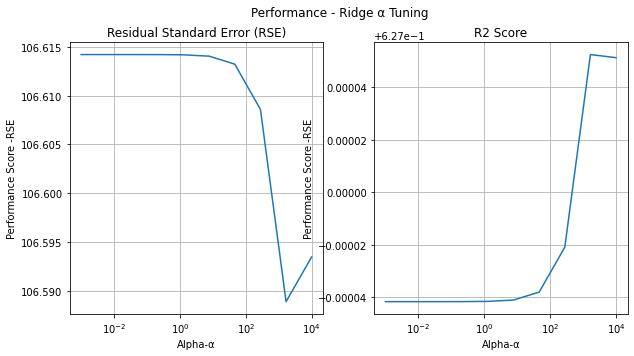

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# CV based grid-search for hyperparameter tuning of the Ridge regression model
# #############################################
# Create the Ridge model
ridge = Ridge()

# Define the range of alpha values to search
alpha_range = np.logspace(-3, 4, 10)

# Perform a grid search to tune the regularization parameter
param_grid = {'alpha': alpha_range}

# Grid Search using neg_mean_squared_error scoring
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha Ridge - MSE Scoring: {:.5f}".format(best_alpha))

# Grid Search using r2 scoring
ridge2 = Ridge()
grid_search_r2 = GridSearchCV(ridge2, param_grid, cv=5, scoring='r2')
grid_search_r2.fit(X_train, y_train)
best_alpha_r2 = grid_search_r2.best_params_['alpha']
print("Best alpha Ridge - R2 Scoring: {:.5f}".format(best_alpha_r2))

# Re-Train final Ridge model Using the “best-α” 
# #############################################
ridge = Ridge(alpha=best_alpha)

# re-train to obtain the final Ridge regression model.
ridge.fit(X_train, y_train)

# predict on the test set using Final Model
y_pred = ridge.predict(X_test)

# Performance Evaluation
# #############################################

# Compute the RSE and R2 error on the test set
rse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ridge = r2_score(y_test, y_pred)
print("Residual Standard Error [RSE]: {:.4f}".format(rse_ridge))
print("R2 statistic: {:.4f}".format(r2_ridge))

# Plot RSE and R2 change over through GridSearchCV hyper parameter tuning
# #############################################

# RSE Results
results_mse = pd.DataFrame(grid_search.cv_results_)
mse_scores = -results_mse['mean_test_score']
mse_alphas = results_mse['param_alpha']

# R2 Scores
results_r2 = pd.DataFrame(grid_search_r2.cv_results_)
r2_scores = results_r2['mean_test_score']
r2_alphas = results_r2['param_alpha']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot RSE on the left subplot
axs[0].plot(mse_alphas, mse_scores)
axs[0].set_xlabel('Alpha-α')
axs[0].set_ylabel('Performance Score -RSE')
axs[0].set_xscale('log')
axs[0].set_title('Residual Standard Error (RSE)')
axs[0].grid(True, which="both")

# Plot R2 on the right subplot
axs[1].plot(r2_alphas, r2_scores)
axs[1].set_xlabel('Alpha-α')
axs[1].set_ylabel('Performance Score -RSE')
axs[1].set_xscale('log')
axs[1].set_title('R2 Score')
axs[1].grid(True, which="both")

# Set the overall title for the figure
fig.suptitle('Performance - Ridge α Tuning')

plt.show()


# Question 3

---

* Repeat the above experiment with a multivariate Lasso regression model. 
* Plot the performance of the models explored during the “α” hyperparameter tuning phase as function of “α”. 
* Compare the performance of the final Lasso regression model with that of both the Ridge regression and the “simple” linear regression models.



### Coparision of Performance of Lasso, Ridge, Simple Linear Regression Models

**Lasso Regression Model:** 
* Residual Standard Rrror (RSE): 9.541807510700313
* R2 score: 0.5952917560883537

**Ridge Regression Model:** 
* Residual Standard Error [RSE]: 9.5428
* R2 statistic: 0.5952

**Simple Linear Regression Model:** 
* Residual Standard Error [RSE]: 10.3412
* R2 statistic: 0.6202

#### Best Estimator: Lasso(alpha=0.02154)





Best alpha lasso - RSE Scoring: 0.02154
Best alpha lasso - R2 Scoring: 0.02154


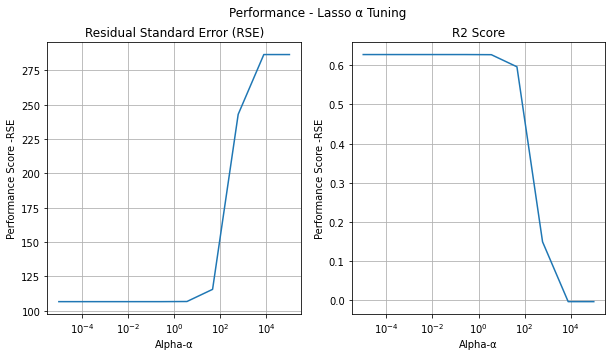

Lasso - Residual Standard Rrror (RSE): 9.541807510700313
Lasso - R2 score: 0.5952917560883537
Ridge - Residual Standard Error [RSE]: 9.5414
Ridge - R2 statistic: 0.5953
Simple Linear - Residual Standard Error [RSE]: 10.3412
Simple Linear - R2 statistic: 0.6202


In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# CV based grid-search for hyperparameter tuning of the Lasso regression model
# #############################################
# Cerate the Lasso model
lasso = Lasso()
# lasso = Lasso(max_iter=10000)

# Define the range of alpha values to search
alpha_range = np.logspace(-5, 5, 10)

# Perform a grid search to tune the regularization parameter
param_grid = {'alpha': alpha_range}

# Perform hyperparameter tuning using cross-validation and grid search
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha lasso - RSE Scoring: {:.5f}".format(best_alpha))

# Grid Search using r2 scoring
lasso2 = Lasso()
grid_search_r2 = GridSearchCV(lasso2, param_grid, cv=5, scoring='r2')
grid_search_r2.fit(X_train, y_train)
best_alpha_r2 = grid_search_r2.best_params_['alpha']
print("Best alpha lasso - R2 Scoring: {:.5f}".format(best_alpha_r2))

# Plot RSE and R2 change over through GridSearchCV hyper parameter tuning
# #############################################

# RSE Results
results_mse = pd.DataFrame(grid_search.cv_results_)
mse_scores = -results_mse['mean_test_score']
mse_alphas = results_mse['param_alpha']

# R2 Scores
results_r2 = pd.DataFrame(grid_search_r2.cv_results_)
r2_scores = results_r2['mean_test_score']
r2_alphas = results_r2['param_alpha']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot RSE on the left subplot
axs[0].plot(mse_alphas, mse_scores)
axs[0].set_xlabel('Alpha-α')
axs[0].set_ylabel('Performance Score -RSE')
axs[0].set_xscale('log')
axs[0].set_title('Residual Standard Error (RSE)')
axs[0].grid(True, which="both")

# Plot R2 on the right subplot
axs[1].plot(r2_alphas, r2_scores)
axs[1].set_xlabel('Alpha-α')
axs[1].set_ylabel('Performance Score -RSE')
axs[1].set_xscale('log')
axs[1].set_title('R2 Score')
axs[1].grid(True, which="both")

# Set the overall title for the figure
fig.suptitle('Performance - Lasso α Tuning')

plt.show()

# Re-Train final Lasso regression model Using the “best” “α” hyperparameter
# #############################################
lasso_final = Lasso(alpha=best_alpha)
lasso_final.fit(X_train, y_train)

# predict on the test set using Final Model
y_pred = lasso_final.predict(X_test)

# Performance Evaluation
# #############################################

# Evaluate the final Lasso regression model on the test set using RSE and R2 metrics
rse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lasso = r2_score(y_test, y_pred)
print("Lasso - Residual Standard Rrror (RSE):", rse_lasso)
print("Lasso - R2 score:", r2_lasso)

print("Ridge - Residual Standard Error [RSE]: {:.4f}".format(rse_ridge))
print("Ridge - R2 statistic: {:.4f}".format(r2_ridge))

print("Simple Linear - Residual Standard Error [RSE]: {:.4f}".format(rse_cv_lnr))
print("Simple Linear - R2 statistic: {:.4f}".format(r2_cv_lnr))


# Question 4

---

* Leveraging the experience you gained from the experiments thus far and/or conducting further experiments using the rich array of regression models available in the scikit-learn, design the “best” regression model for predicting
compressive strength of a concrete mixture from the 8 features mentioned previously.

* The only restriction is that, you may not use datasets other than the ones provided as part of this assignment.

* Submit this “best” regression model as specified method.



### NOTE For the Instructer: 
* Attached the Final python File **group12_best_model.py** to Import and test the **predictCompressiveStrength** function.

* Attached a Demo file **demo_test_model.py** for the Usage of the function.

* In this Jupyter Notebook, Just Demostrated the usage of **Best Regression Model**.



### Discusstion:

* **Gradient Boosting Regressor** (GBR) is used for the Final Best Model Submitted for the Question 4.

* Gradient Boosting Regressor works by combining several weak or simple prediction models, such as decision trees, into a single strong prediction model.

* Parameters of GradientBoostingRegressor:

    * n_estimators: The number of boosting stages to perform.
    * learning_rate: The shrinkage parameter that controls the contribution of each tree. Smaller values of learning rate will require more boosting stages to achieve the same performance.
    * max_depth: The maximum depth of each tree in the ensemble. This controls the complexity of the model and helps to prevent overfitting.
    * min_samples_split: The minimum number of samples required to split a node in a decision tree. It can help to prevent overfitting and improve the generalization of the model.
    * min_samples_leaf: The minimum number of samples required to be at a leaf node in a decision tree. It can help to prevent overfitting and improve the generalization of the model.
    * subsample: The fraction of samples to be used for fitting each individual tree. It can help to reduce the variance of the model and improve its robustness to noise.
    * loss: The loss function to be optimized during the training. It determines the objective that the model tries to minimize, such as mean squared error (MSE), mean absolute error (MAE), or Huber loss.
    * random_state: The random seed used by the random number generator for reproducibility.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

def predictCompressiveStrength(Xtest, data_dir):

  # Load the Data
  #############################################
  p_train_data = data_dir+"train.csv"
  p_test_data = data_dir+"test.csv"

  train_data = pd.read_csv(p_train_data)
  test_data = pd.read_csv(p_test_data)

  # Extract the Data
  #############################################
  # Extract the Design Matrix of 8 features from the Data Set
  X_train = train_data.iloc[:, :-1] # Training
  X_test = test_data.iloc[:, :-1]   # Test

  # Extract Output from the Data Set
  Y_train = train_data.iloc[:, -1]  # Training
  Y_test = test_data.iloc[:, -1]    # Test

  # Create a GradientBoostingRegressor model and Tune its Hyper-Parameter
  # ############################################################################ 
  model = GradientBoostingRegressor()

  # Define the hyperparameters to be tuned
  param_grid = {'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 1],
                'max_depth': [3, 5, 7]}
                
  # param_grid = {'n_estimators': [100, 500, 1000],
  #               'learning_rate': [0.01, 0.1, 0.5],
  #               'max_depth': [3, 5, 10]}
                
  # Use GridSearchCV to find the best hyperparameters
  grid_search = GridSearchCV(model, param_grid, cv=5)
  grid_search.fit(X_train, Y_train)

  # Print the best hyperparameters
  print("Best Hyperparameters:", grid_search.best_params_)

  # Create the Final GradientBoostingRegressor model using "Best" Hyper-Parameters
  # ############################################################################ 
  final_model = GradientBoostingRegressor(**grid_search.best_params_)

  # Combine Training data and the Validation/Test Data
  X_Comb = pd.concat([X_train, X_test], ignore_index=True)
  Y_Comb = pd.concat([Y_train, Y_test], ignore_index=True)

  # Train the final model on the Combined training and Validation Data
  final_model.fit(X_Comb, Y_Comb)

  # Make predictions on the Blinded test data
  y_pred = final_model.predict(Xtest)

  # Return the predictions on the Blinded Test Data
  return y_pred

### Demo Usage of predictCompressiveStrength function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Import the Group12_best_model Prediction Function
# from group12_best_model import predictCompressiveStrength

# Load and Extract the X,Y From the Blinded Test Data file
#data_dir = "./data/"
data_dir = "./"
p_btest_data = data_dir+"test_blind.csv"
blind_test_data = pd.read_csv(p_btest_data)

X_bl_test = blind_test_data.iloc[:, :-1]
Y_bl_test = blind_test_data.iloc[:, -1]

# Predict the Compressive Strength for the Blind Test X Data
y_pred_best = predictCompressiveStrength(X_bl_test, data_dir)

# Evaluate the final Best regression model on the Blind test Data using R2 metrics
rse_best = np.sqrt(mean_squared_error(Y_bl_test, y_pred_best))
r2_best = r2_score(Y_bl_test, y_pred_best)

print("Best - Residual Standard Rrror (RSE):", rse_best)
print("Best - R2 score:", r2_best)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best - Residual Standard Rrror (RSE): 5.335016815784994
Best - R2 score: 0.8558338227253394
